III. Previsão de renda
Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base previsao_de_renda.csv.

variavel	descrição
data_ref	Data de referência de coleta das variáveis
index	Código de identificação do cliente
sexo	Sexo do cliente
posse_de_veiculo	Indica se o cliente possui veículo
posse_de_imovel	Indica se o cliente possui imóvel
qtd_filhos	Quantidade de filhos do cliente
tipo_renda	Tipo de renda do cliente
educacao	Grau de instrução do cliente
estado_civil	Estado civil do cliente
tipo_residencia	Tipo de residência do cliente (própria, alugada etc)
idade	Idade do cliente
tempo_emprego	Tempo no emprego atual
qt_pessoas_residencia	Quantidade de pessoas que moram na residência
renda	Renda em reais






In [1]:
import pandas as pd
import seaborn as sns
import patsy
from sklearn.tree import plot_tree
from seaborn import load_dataset
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from   sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from   sklearn.metrics import r2_score
import statsmodels.api as sm
import os
# Fixing random state for reproducibility
np.random.seed(2360873)


*Tratando a Base:*

In [2]:
df= pd.read_csv('/content/previsao_de_renda.csv')
df


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [3]:
df.describe()

,Unnamed: 0,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,15000.000000,15000.000000,12427.000000,15000.000000,15000.000000
mean,7499.500000,8304.871400,0.432333,43.882333,7.722635,2.206400,5697.287057
std,4330.271354,4797.780446,0.746631,11.273155,6.711189,0.909792,8266.816289
min,0.000000,1.000000,0.000000,22.000000,0.117808,1.000000,118.710000
25%,3749.750000,4181.000000,0.000000,34.000000,2.973973,2.000000,2026.110000
50%,7499.500000,8297.000000,0.000000,43.000000,6.013699,2.000000,3499.720000
75%,11249.250000,12403.000000,1.000000,53.000000,10.120548,3.000000,6392.167500
max,14999.000000,16649.000000,14.000000,68.000000,42.906849,15.000000,245141.670000


In [4]:
# verifica quais linhas missing
df.isnull()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
14997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#Levantamento dos dados faltantes

def stats_dados_faltantes(df: pd.DataFrame) -> None:
 stats_dados_faltantes = []
 for col in df.columns:
    if df[col].isna().any():
       qtd, _ = df[df[col].isna()].shape
       total, _ = df.shape
       dict_dados_faltantes = {col:
       {
        'quantidade': qtd,
        "porcentagem": round(100 * qtd/total, 2)
        }
        }
 stats_dados_faltantes.append(stats_dados_faltantes)
 for stat in stats_dados_faltantes:
   print(stat)

stats_dados_faltantes(df=df)

stats_dados_faltantes(df=df[df['renda'] == 0])

stats_dados_faltantes(df=df[df['renda'] == 1])

[[...]]
[[...]]
[[...]]


In [6]:
df=df.drop(['Unnamed: 0','id_cliente','data_ref'], axis=1)

In [7]:
# Contagem de todas linhas com algo missing
df.isnull().sum() # para obter o percentual, utilize .mean()
# Remover Linhas com NA
df = df.dropna()
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57
14995,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [8]:
df.shape

(12427, 12)

In [9]:
df=df.drop_duplicates()
df.shape

(8655, 12)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df.tail()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
8650,M,False,True,0,Assalariado,Superior completo,Casado,Casa,58,4.164384,2.0,15702.40
8651,M,False,False,1,Assalariado,Superior completo,Casado,Casa,33,1.041096,3.0,1918.14
8652,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
8653,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27
8654,F,False,True,2,Servidor público,Secundário,União,Casa,34,7.219178,4.0,1160.99


In [12]:
percentage=(df.isnull().sum()/len(df))*100
percentage

sexo                     0.0
posse_de_veiculo         0.0
posse_de_imovel          0.0
qtd_filhos               0.0
tipo_renda               0.0
educacao                 0.0
estado_civil             0.0
tipo_residencia          0.0
idade                    0.0
tempo_emprego            0.0
qt_pessoas_residencia    0.0
renda                    0.0
dtype: float64

In [13]:
x=df.drop(['renda'], axis=1)
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(x,imp))

[['F' False True ... 26 6.602739726027397 1.0]
 ['M' True True ... 28 7.183561643835616 2.0]
 ['F' True True ... 35 0.8383561643835616 2.0]
 ...
 ['F' True True ... 45 7.832876712328768 2.0]
 ['M' True False ... 36 4.298630136986302 2.0]
 ['F' False True ... 34 7.219178082191781 4.0]]


In [14]:
y=df.drop(['sexo',	'posse_de_veiculo',	'posse_de_imovel',	'qtd_filhos',	'tipo_renda',	'educacao',	'estado_civil',	'tipo_residencia',	'idade',	'tempo_emprego',	'qt_pessoas_residencia'], axis=1)

In [15]:
x.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0


In [16]:
y.head()

,renda
0,8060.34
1,1852.15
2,2253.89
3,6600.77
4,6475.97


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


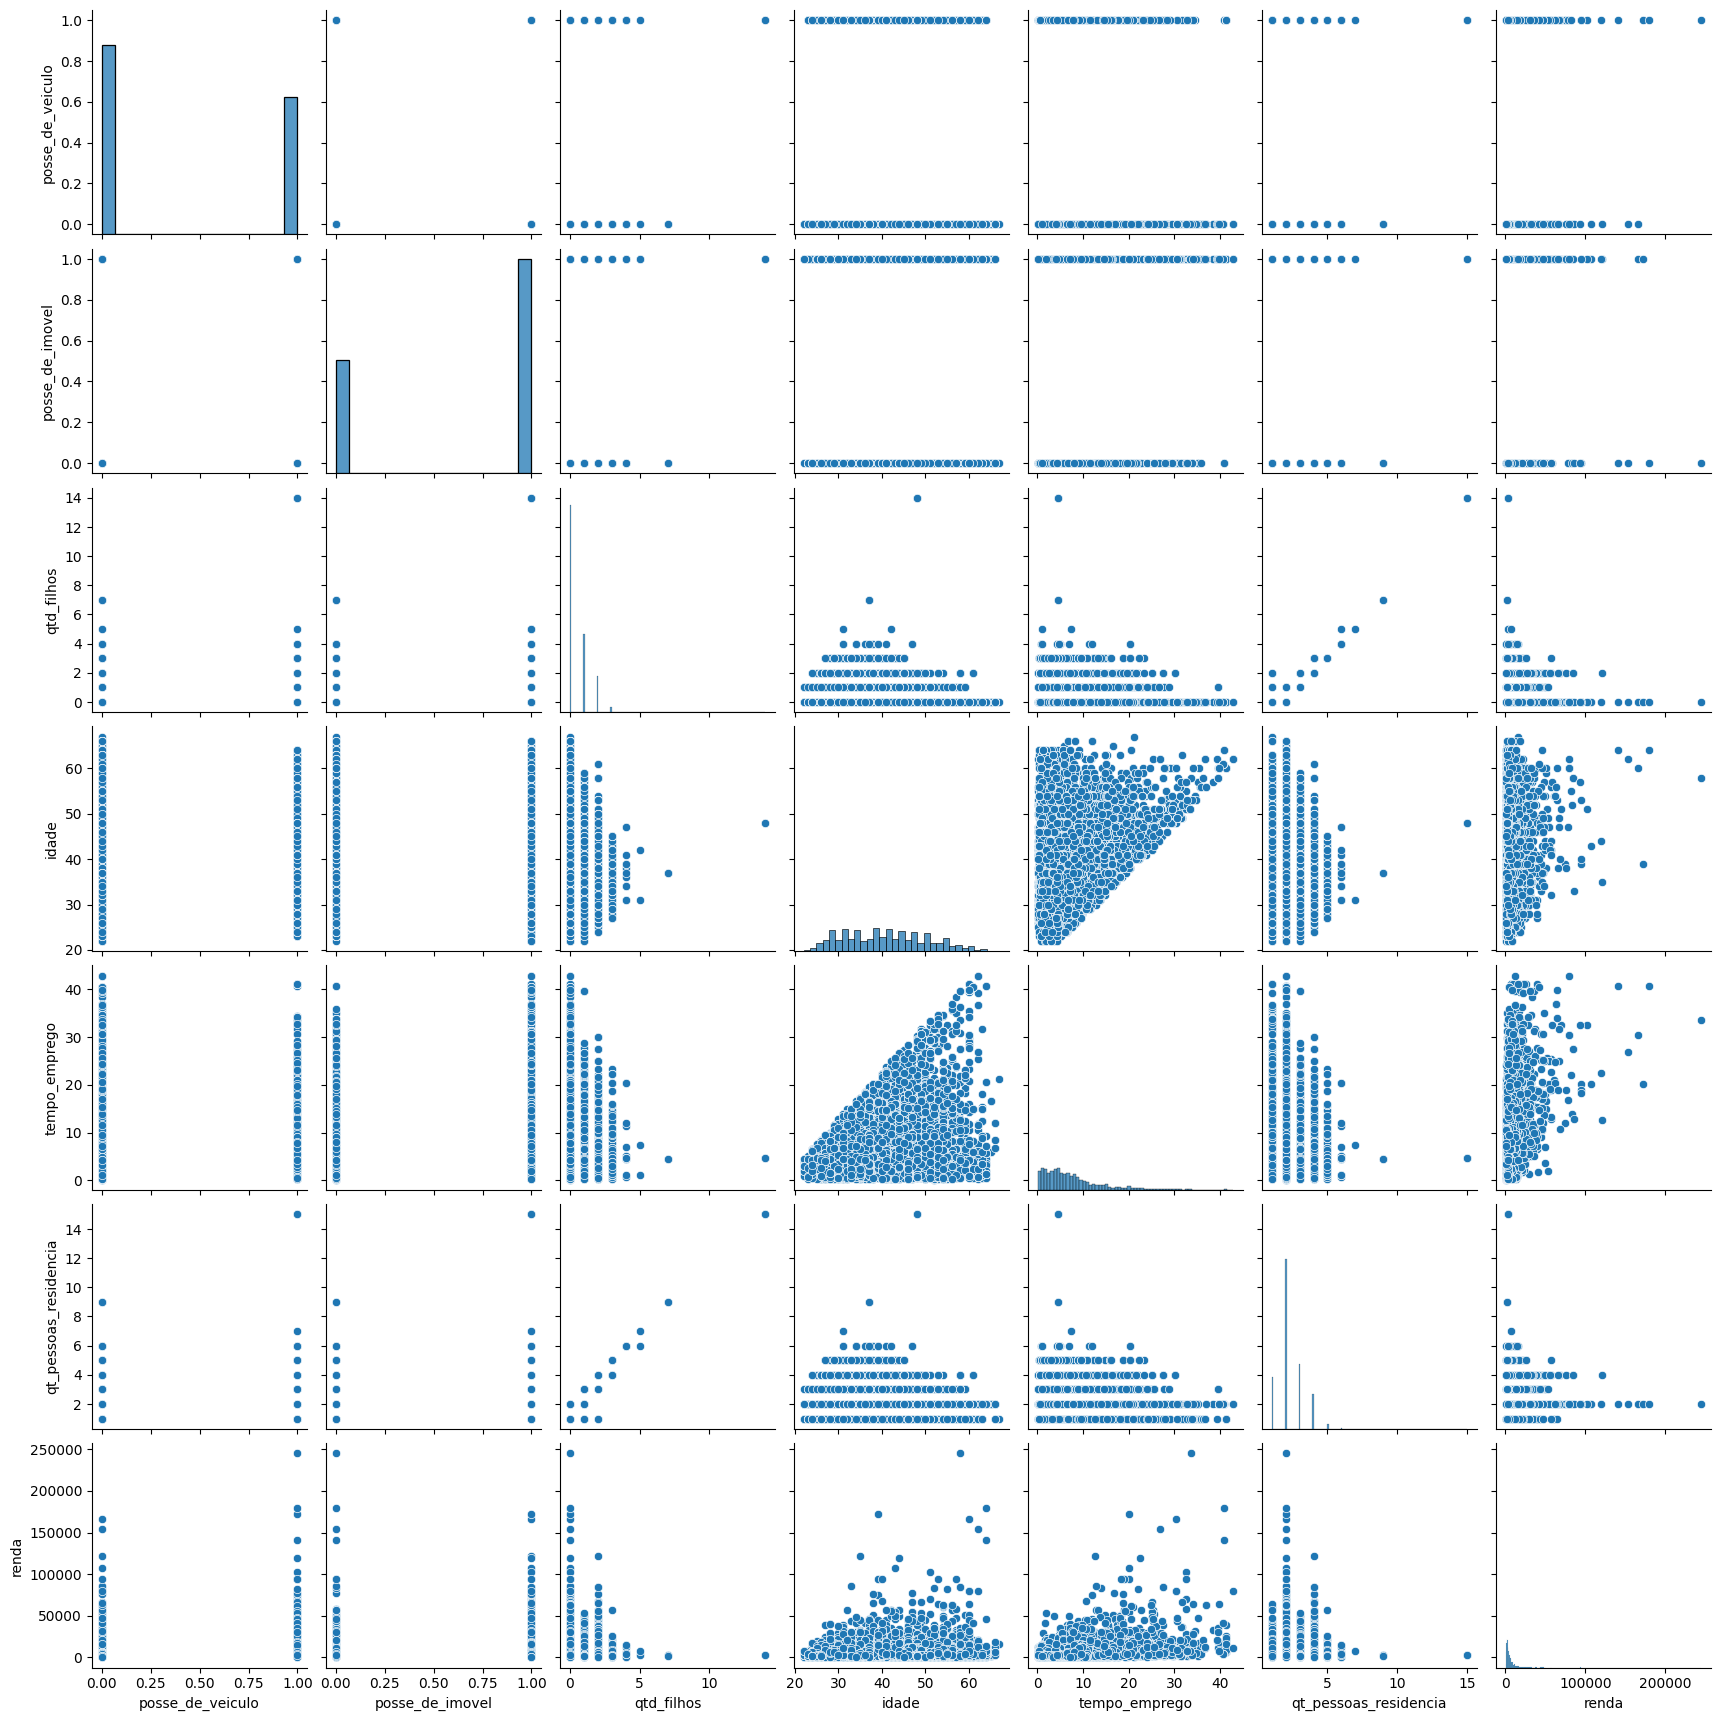

In [17]:
sns.pairplot(df)

In [18]:
corrmat=df.corr()
corrmat

<ipython-input-18-0060f74d5781>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df.corr()


,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,0.003070,0.091497,-0.112206,-0.077788,0.136081,0.087229
posse_de_imovel,0.003070,1.000000,0.014739,0.094276,0.014564,0.012771,0.016121
qtd_filhos,0.091497,0.014739,1.000000,-0.275781,-0.059859,0.903157,0.005047
idade,-0.112206,0.094276,-0.275781,1.000000,0.320322,-0.246085,0.123584
tempo_emprego,-0.077788,0.014564,-0.059859,0.320322,1.000000,-0.058999,0.375314
qt_pessoas_residencia,0.136081,0.012771,0.903157,-0.246085,-0.058999,1.000000,0.023250
renda,0.087229,0.016121,0.005047,0.123584,0.375314,0.023250,1.000000


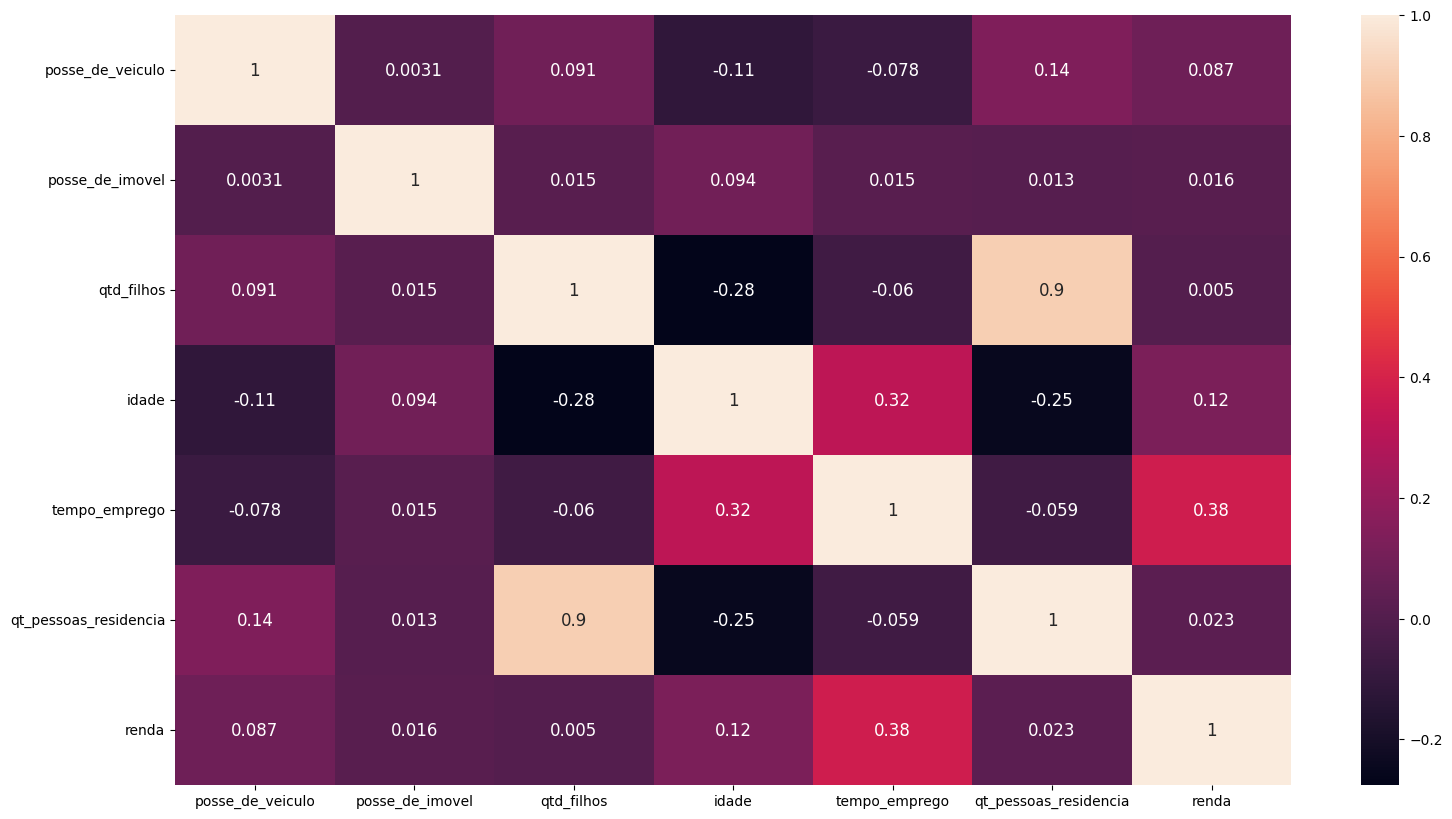

In [19]:
plt.subplots(figsize=(18,10))
sns.heatmap(corrmat,annot=True,annot_kws={'size':12})
plt.show()

In [20]:
x=pd.get_dummies(x, drop_first=True)
print(x.info())
x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               8655 non-null   bool   
 1   posse_de_imovel                8655 non-null   bool   
 2   qtd_filhos                     8655 non-null   int64  
 3   idade                          8655 non-null   int64  
 4   tempo_emprego                  8655 non-null   float64
 5   qt_pessoas_residencia          8655 non-null   float64
 6   sexo_M                         8655 non-null   uint8  
 7   tipo_renda_Bolsista            8655 non-null   uint8  
 8   tipo_renda_Empresário          8655 non-null   uint8  
 9   tipo_renda_Pensionista         8655 non-null   uint8  
 10  tipo_renda_Servidor público    8655 non-null   uint8  
 11  educacao_Pós graduação         8655 non-null   uint8  
 12  educacao_Secundário            8655 non-null   u

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,0,26,6.602740,1.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,True,True,0,28,7.183562,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,True,True,0,35,0.838356,2.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,False,True,1,30,4.846575,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,True,False,0,33,4.293151,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [21]:
y=pd.get_dummies(y, drop_first=True)
print(y.info())
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   renda   8655 non-null   float64
dtypes: float64(1)
memory usage: 67.7 KB
None


,renda
0,8060.34
1,1852.15
2,2253.89
3,6600.77
4,6475.97


In [22]:
x=pd.get_dummies(x, drop_first=True)
print(x.info())
x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               8655 non-null   bool   
 1   posse_de_imovel                8655 non-null   bool   
 2   qtd_filhos                     8655 non-null   int64  
 3   idade                          8655 non-null   int64  
 4   tempo_emprego                  8655 non-null   float64
 5   qt_pessoas_residencia          8655 non-null   float64
 6   sexo_M                         8655 non-null   uint8  
 7   tipo_renda_Bolsista            8655 non-null   uint8  
 8   tipo_renda_Empresário          8655 non-null   uint8  
 9   tipo_renda_Pensionista         8655 non-null   uint8  
 10  tipo_renda_Servidor público    8655 non-null   uint8  
 11  educacao_Pós graduação         8655 non-null   uint8  
 12  educacao_Secundário            8655 non-null   u

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,0,26,6.602740,1.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,True,True,0,28,7.183562,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,True,True,0,35,0.838356,2.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,False,True,1,30,4.846575,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,True,False,0,33,4.293151,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Separando em treino e teste

In [23]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [24]:
x.isna().sum()

posse_de_veiculo                 0
posse_de_imovel                  0
qtd_filhos                       0
idade                            0
tempo_emprego                    0
qt_pessoas_residencia            0
sexo_M                           0
tipo_renda_Bolsista              0
tipo_renda_Empresário            0
tipo_renda_Pensionista           0
tipo_renda_Servidor público      0
educacao_Pós graduação           0
educacao_Secundário              0
educacao_Superior completo       0
educacao_Superior incompleto     0
estado_civil_Separado            0
estado_civil_Solteiro            0
estado_civil_União               0
estado_civil_Viúvo               0
tipo_residencia_Casa             0
tipo_residencia_Com os pais      0
tipo_residencia_Comunitário      0
tipo_residencia_Estúdio          0
tipo_residencia_Governamental    0
dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6924, 24), (1731, 24), (6924, 1), (1731, 1))

In [27]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [28]:
y_predict=model.predict(x_test)

In [29]:
y_predict,y_test

(array([ 3562.22      ,  7338.12      ,  7844.77      , ...,
        23240.98      ,  2647.69      ,  2433.83166667]),
         renda
 1003  2522.68
 1819  4159.29
 6090  1836.70
 3916  4395.67
 8480  4154.75
 ...       ...
 5416  1923.65
 3260  4134.78
 287   2538.29
 8097  1595.22
 7503  1523.89
 
 [1731 rows x 1 columns])

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_predict)

0.05767340340924121

In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predict)

4307.125178877785

In [32]:
mean_squared_error(y_test,y_predict)

77203302.27416858

In [33]:
np.sqrt(mean_squared_error(y_test,y_predict))

8786.54097322539

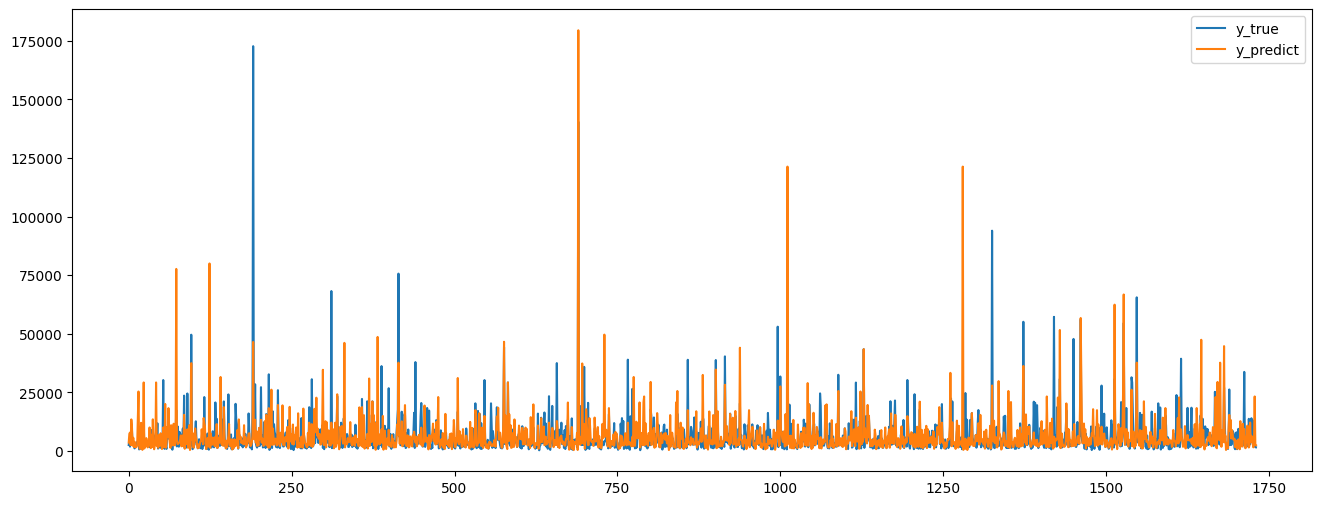

In [34]:
plt.subplots(figsize=(16,6))
x_points =list(range(len(y_test)))
plt.plot(x_points,y_test,label='y_true')
plt.plot(x_points,y_predict,label='y_predict')
plt.legend()
plt.show()

In [35]:
def plot_learning_curve(estimator,title,x,y,ylim=None,cv=None,
                       train_size=np.linspace(0.1,1,10)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel("Score")

    train_sizes,train_scores,test_scores=learning_curve(estimator,x,y,cv=cv,train_sizes=train_size)

    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)

    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)

    plt.grid()
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,
                     train_scores_mean+train_scores_std,alpha=0.1,color='red')
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,
                     test_scores_mean+test_scores_std,alpha=0.1,color='green')
    plt.plot(train_sizes,train_scores_mean,'o-',color='red',label='traning score')
    plt.plot(train_sizes,test_scores_mean,'o-',color='green',label='test score')
    plt.legend(loc='best')
    return plt

Criando duas árvores de Regressão(profundidade 2 e 8)

In [36]:
from yellowbrick.regressor import ResidualsPlot

In [37]:
clf = DecisionTreeClassifier(max_depth=2, random_state=100)
clf

DecisionTreeClassifier(max_depth=2, random_state=100)

In [38]:
reg_1=DecisionTreeRegressor(max_depth=2)
reg_2=DecisionTreeRegressor(max_depth=8)

reg_1.fit(x_train, y_train)
reg_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

Verificando MSE, R-quadrado das árvores: O mais adquado é a reg_2 com r-quadrado: 0,66

In [39]:
mse1=reg_1.score(x_train,y_train)
mse2=reg_2.score(x_train,y_train)

template="O R-quadrado da árvore com profundidade={0} e:{1:.2f}"

print(template.format(reg_1.get_depth(),mse1).replace(".",","))
print(template.format(reg_2.get_depth(),mse2).replace(".",","))

O R-quadrado da árvore com profundidade=2 e:0,28
O R-quadrado da árvore com profundidade=8 e:0,66


### 2.  Calculando o caminho indicado pelos CCP-alfas dessa árvore.

In [40]:
path=reg_2.cost_complexity_pruning_path(x_train,y_train)


In [41]:
ccp_alphas, impurities= path.ccp_alphas, path.impurities

o gráfico abaixo mostra um aumento significante no intervalo [0.0,1.0]

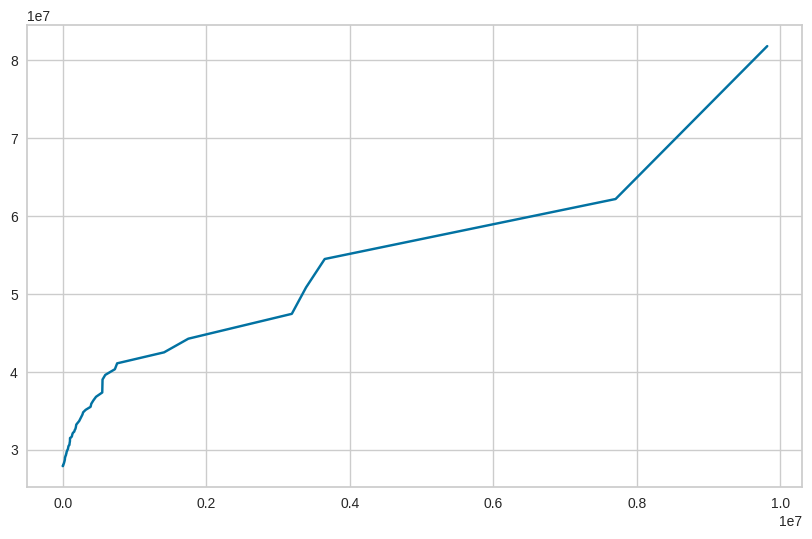

In [42]:
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, impurities)
plt.xlabel=("Alpha efetivo")
plt.ylabel=("impureza total das folhas")

### 3.Paca cada valor de alpha obtido no item 2, foi treinado uma árvore com o respectivo alfa, e guardado essa árvore em uma lista.

In [43]:
path=reg_1.cost_complexity_pruning_path(x_train,y_train)
path
ccp_alphas, impurities= path.ccp_alphas, path.impurities
clfs=[]
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)
clfs

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=3650458.6875036582, random_state=0),
 DecisionTreeRegressor(ccp_alpha=9815836.818770487, random_state=0)]

### 4. calculando o MSE de cada árvore contida na lista acima.

In [44]:
path=reg_1.cost_complexity_pruning_path(x_train,y_train)
path
ccp_alphas, impurities= path.ccp_alphas, path.impurities
mse=[]
for clf in clfs:
    mse1=clf.score(x_train,y_train)

    mse.append(mse1)

mse

[0.827765791698887, 0.3339932077962934, 0.23987333173294678]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

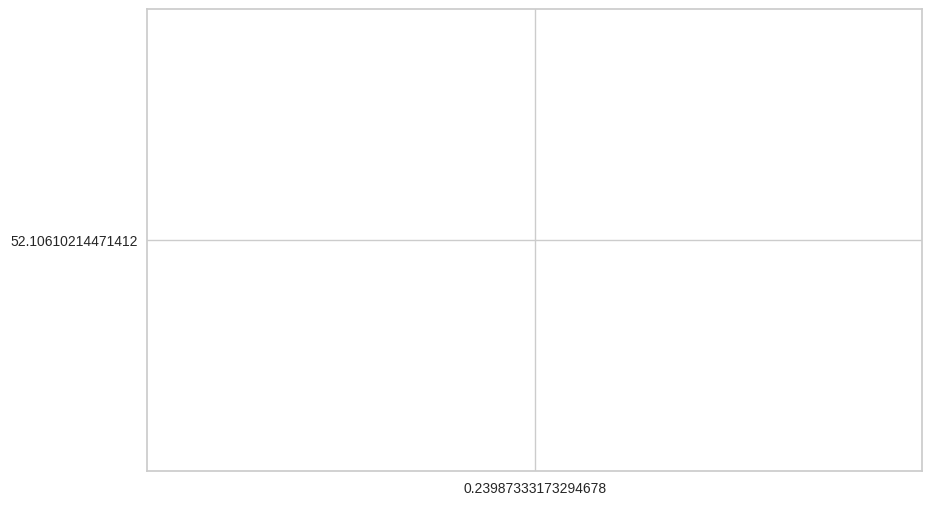

In [45]:
mse=['0.23987333173294678']
alpha=['52.10610214471412']

N = 50

x = mse
y = alpha

df1 = pd.DataFrame({'x':x, 'y':y})

plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.xlabel=("mse")
plt.ylabel=("alpha")




### 6. Calculando o R-quadrado dessa árvore encontrada no item acima

In [46]:
clf=DecisionTreeRegressor(ccp_alpha=52.10610214471412, random_state=0),
clf

(DecisionTreeRegressor(ccp_alpha=52.10610214471412, random_state=0),)

In [47]:
reg_3=DecisionTreeRegressor(ccp_alpha=52.10610214471412)
reg_3.fit(x_train, y_train)


DecisionTreeRegressor(ccp_alpha=52.10610214471412)

In [48]:
mse1=reg_3.score(x_train,y_train)


template="O R-quadrado da árvore com profundidade={0} e:{1:.2f}"

print(template.format(reg_3.get_depth(),mse1).replace(".",","))


O R-quadrado da árvore com profundidade=36 e:0,83


Pode se perceber que essa árvore possui um R-quarado bem melhor que as anteriores

### 7. Visualizando a árvore.

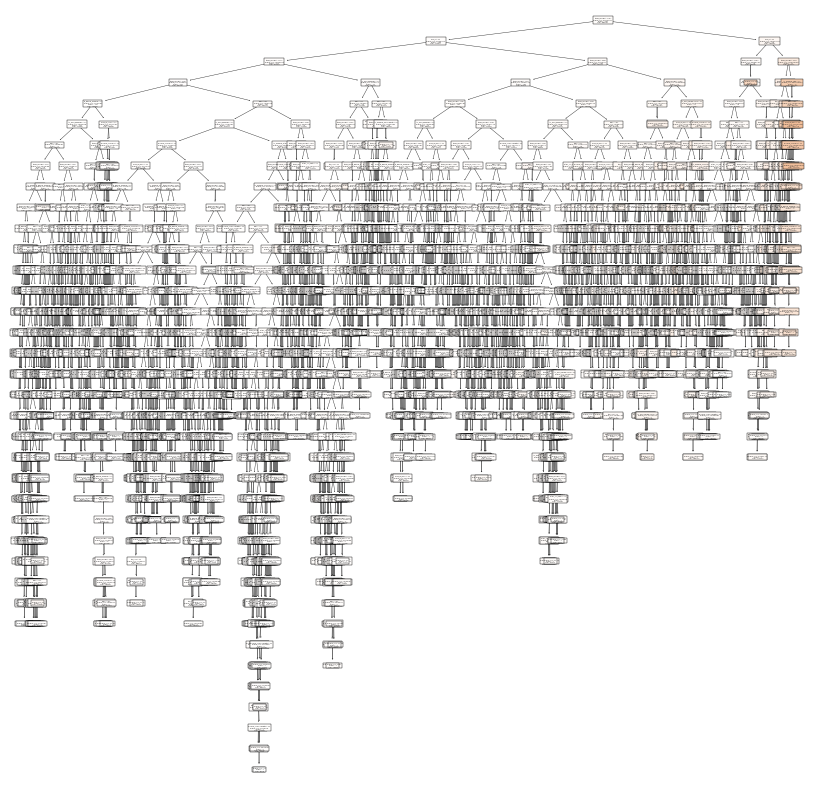

In [49]:

from numpy.ma.core import filled
plt.figure(figsize=[10,10])
plot_tree(reg_3,
            filled=True,
           class_names=['mse','alpha'],
           feature_names=x_train.columns);

In [50]:
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
8650,M,False,True,0,Assalariado,Superior completo,Casado,Casa,58,4.164384,2.0,15702.40
8651,M,False,False,1,Assalariado,Superior completo,Casado,Casa,33,1.041096,3.0,1918.14
8652,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
8653,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.



In [51]:
# Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável
y,x=patsy.dmatrices('renda~ tempo_emprego+1', df[:5])
x

DesignMatrix with shape (5, 2)
  Intercept  tempo_emprego
          1        6.60274
          1        7.18356
          1        0.83836
          1        4.84658
          1        4.29315
  Terms:
    'Intercept' (column 0)
    'tempo_emprego' (column 1)

In [52]:
x

DesignMatrix with shape (5, 2)
  Intercept  tempo_emprego
          1        6.60274
          1        7.18356
          1        0.83836
          1        4.84658
          1        4.29315
  Terms:
    'Intercept' (column 0)
    'tempo_emprego' (column 1)

In [53]:
y

DesignMatrix with shape (5, 1)
    renda
  8060.34
  1852.15
  2253.89
  6600.77
  6475.97
  Terms:
    'renda' (column 0)

In [54]:
#retirando o intercepto. Para isso somente colocar + 0
y,x=patsy.dmatrices('renda~ tempo_emprego+0', df[:5])
y

DesignMatrix with shape (5, 1)
    renda
  8060.34
  1852.15
  2253.89
  6600.77
  6475.97
  Terms:
    'renda' (column 0)

In [55]:
#verificando o log e total de renda:
y,x=patsy.dmatrices('renda~ np.log(tempo_emprego)+ standardize (qtd_filhos) + center(idade)' , df[:5])
x

DesignMatrix with shape (5, 4)
  Intercept  np.log(tempo_emprego)  standardize(qtd_filhos)  center(idade)
          1                1.88748                     -0.5           -4.4
          1                1.97180                     -0.5           -2.4
          1               -0.17631                     -0.5            4.6
          1                1.57827                      2.0           -0.4
          1                1.45702                     -0.5            2.6
  Terms:
    'Intercept' (column 0)
    'np.log(tempo_emprego)' (column 1)
    'standardize(qtd_filhos)' (column 2)
    'center(idade)' (column 3)

In [56]:
y

DesignMatrix with shape (5, 1)
    renda
  8060.34
  1852.15
  2253.89
  6600.77
  6475.97
  Terms:
    'renda' (column 0)

In [57]:
reg = smf.ols('renda ~ tempo_emprego', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1419.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          1.22e-287
Time:                        00:58:26   Log-Likelihood:                -90473.
No. Observations:                8655   AIC:                         1.810e+05
Df Residuals:                    8653   BIC:                         1.810e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2185.3608    137.847     15.853      0.000    1915.147    2455.574
tempo_emprego   503.8133     13.376     37.666      0.000     477.593     530.033
==============================================================================
Omnibus:                    12371.905   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6824222.773
Skew:                           8.295   Prob(JB):                         0.00
Kurtosis:                     139.558   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#verificando o log e total da conta padronizada:
y,x=patsy.dmatrices('sexo~renda + standardize (tempo_emprego) + center(renda)' , df[:5])
x

DesignMatrix with shape (5, 4)
  Intercept    renda  standardize(tempo_emprego)  center(renda)
          1  8060.34                     0.82938       3011.716
          1  1852.15                     1.08979      -3196.474
          1  2253.89                    -1.75506      -2794.734
          1  6600.77                     0.04201       1552.146
          1  6475.97                    -0.20612       1427.346
  Terms:
    'Intercept' (column 0)
    'renda' (column 1)
    'standardize(tempo_emprego)' (column 2)
    'center(renda)' (column 3)

In [59]:
#Vamos somar a renda  com tempo_emprego:
y,x=patsy.dmatrices('idade~I(renda + tempo_emprego) + renda + tempo_emprego' , df[:5])
x

DesignMatrix with shape (5, 4)
  Intercept  I(renda + tempo_emprego)    renda  tempo_emprego
          1                8066.94274  8060.34        6.60274
          1                1859.33356  1852.15        7.18356
          1                2254.72836  2253.89        0.83836
          1                6605.61658  6600.77        4.84658
          1                6480.26315  6475.97        4.29315
  Terms:
    'Intercept' (column 0)
    'I(renda + tempo_emprego)' (column 1)
    'renda' (column 2)
    'tempo_emprego' (column 3)

**Criando um novo Modelo com base na Matriz de Modelagem**

In [60]:
novos_dados = df[20:30]
new_x = patsy.build_design_matrices([x.design_info], novos_dados)
new_x

[DesignMatrix with shape (10, 4)
   Intercept  I(renda + tempo_emprego)    renda  tempo_emprego
           1                4017.00740  4016.38        0.62740
           1                4675.26959  4655.96       19.30959
           1                5612.61562  5611.78        0.83562
           1                 387.04877   379.52        7.52877
           1                8740.06137  8715.76       24.30137
           1                1058.72233  1055.21        3.51233
           1                2000.16014  1998.33        1.83014
           1                8053.36795  8051.62        1.74795
           1                6400.74890  6392.79        7.95890
           1                2562.14808  2557.77        4.37808
   Terms:
     'Intercept' (column 0)
     'I(renda + tempo_emprego)' (column 1)
     'renda' (column 2)
     'tempo_emprego' (column 3)]

In [61]:
#verificando o log e total renda padronizada:
y,x=patsy.dmatrices('sexo~renda + standardize (tempo_emprego) + center(renda)' , df[:5])
x

DesignMatrix with shape (5, 4)
  Intercept    renda  standardize(tempo_emprego)  center(renda)
          1  8060.34                     0.82938       3011.716
          1  1852.15                     1.08979      -3196.474
          1  2253.89                    -1.75506      -2794.734
          1  6600.77                     0.04201       1552.146
          1  6475.97                    -0.20612       1427.346
  Terms:
    'Intercept' (column 0)
    'renda' (column 1)
    'standardize(tempo_emprego)' (column 2)
    'center(renda)' (column 3)

In [62]:
y,x=patsy.dmatrices('renda~ tempo_emprego+1', df[:5])
modelo=sm.OLS(y,x).fit()
modelo.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                 -0.218
Method:                 Least Squares   F-statistic:                    0.2835
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.631
Time:                        00:58:26   Log-Likelihood:                -46.013
No. Observations:                   5   AIC:                             96.03
Df Residuals:                       3   BIC:                             95.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3475.8621   3262.873      1.065      0.365   -6908.055    1.39e+04
tempo_emprego   330.9074    621.476      0.532      0.631   -1646.906    2308.721
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.955
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.650
Skew:                          -0.667   Prob(JB):                        0.723
Kurtosis:                       1.842   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

Na Análise de Resíduos:<br>
1-O modelo apresentou: <br>p-value:0.000  dentro do padrão, porém o R-squared: 0.088  está pouco significante.<br><br>
Para melhorar a Regressão foi ajustado os seguintes modelos:<br><br>
2-No modelo y,x=patsy.dmatrices('np.log(tempo_emprego+.1) ~ np.log(renda+.1)',df[:5])<br>,com as variáveis transformadas em log, apresentou:<br>p-value:0.519 e R-squared: 0.151, um pouco melhor que o anterior<br><br>
3)No modelo y,x=patsy.dmatrices('np.power(tempo_emprego,2) ~ renda + np.power(renda,2)', df[:5]), apresentou:<br>
P-value:0.373 e R-squared: 0.402, se destacando dos demais, pois está dentro do padrão




In [63]:
reg = smf.ols('renda ~ np.log(tempo_emprego+.1)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     834.4
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          3.05e-175
Time:                        00:58:26   Log-Likelihood:                -90732.
No. Observations:                8655   AIC:                         1.815e+05
Df Residuals:                    8653   BIC:                         1.815e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

<ipython-input-63-fe5b1567b931>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res'] = reg.resid


<ipython-input-64-0f528541a34f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res'] = reg.resid


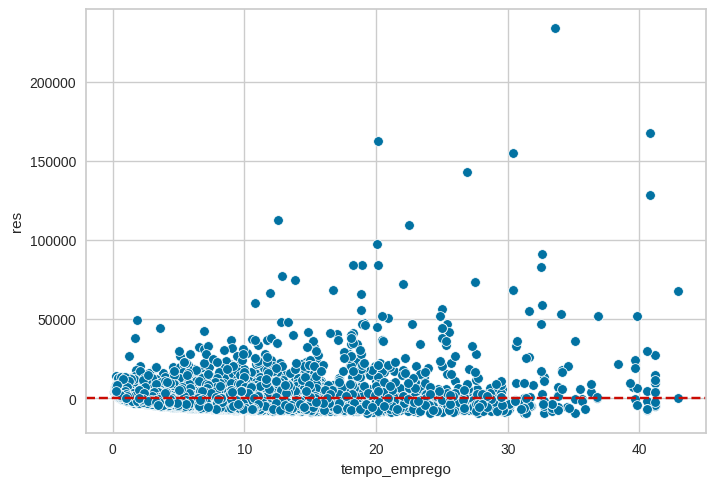

In [64]:
reg = smf.ols('renda ~ np.log(tempo_emprego+.1)', data = df).fit()
#print(reg.summary())
df['res'] = reg.resid
sns.scatterplot(x = 'tempo_emprego', y = df['res'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='tempo_emprego', ylabel='res'>

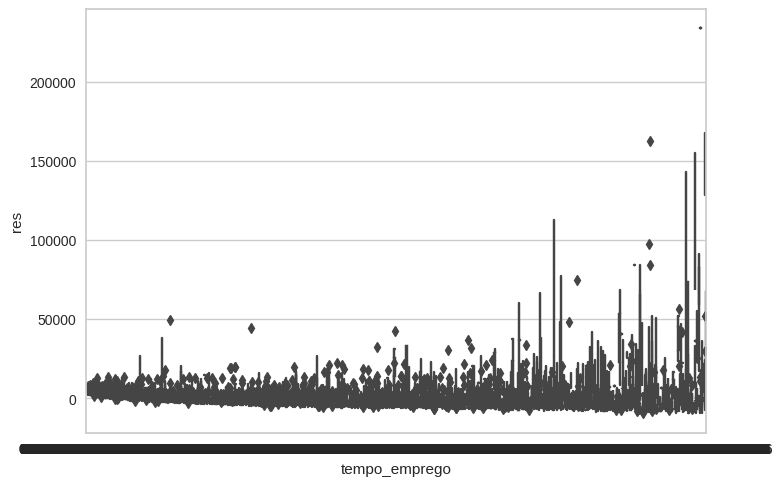

In [65]:
sns.boxplot(x = 'tempo_emprego', y = df['res'], data = df)

<ipython-input-66-f4f3bf779c9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred_log'] = reg.fittedvalues


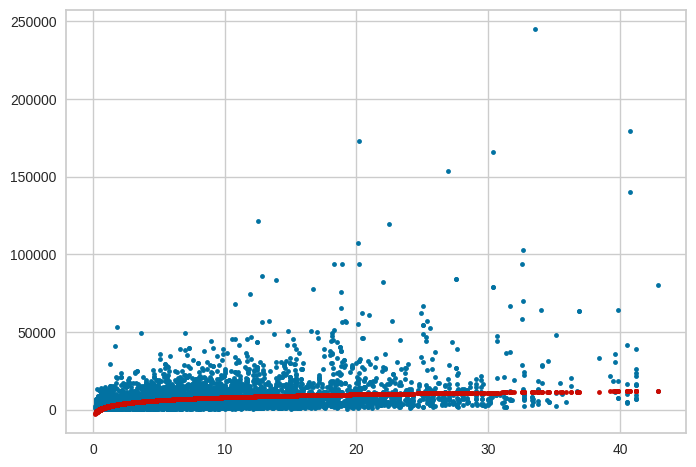

In [66]:
# Análise dos valores preditos
df['pred_log'] = reg.fittedvalues
plt.plot(df['tempo_emprego'],df['renda'],'.')
plt.plot(df['tempo_emprego'],df['pred_log'],'r.')

In [67]:
y,x=patsy.dmatrices('np.log(tempo_emprego+.1) ~ np.log(renda+.1)',df[:5])
modelo=sm.OLS(y,x).fit()
modelo.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(tempo_emprego + .1)   R-squared:                       0.151
Model:                                    OLS   Adj. R-squared:                 -0.133
Method:                         Least Squares   F-statistic:                    0.5315
Date:                        Fri, 27 Oct 2023   Prob (F-statistic):              0.519
Time:                                00:59:14   Log-Likelihood:                -5.2210
No. Observations:                           5   AIC:                             14.44
Df Residuals:                               3   BIC:                             13.66
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.5731      5.438     -0.473      0.668     -19.878      14.732
np.log(renda + .1)     0.4728      0.649      0.729      0.519      -1.591       2.537
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.767
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.141
Skew:                          -0.290   Prob(JB):                        0.932
Kurtosis:                       2.419   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
y,x=patsy.dmatrices('np.power(tempo_emprego,2) ~ renda + np.power(renda,2)', df[:5])
modelo=sm.OLS(y,x).fit()
modelo.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.power(tempo_emprego, 2)   R-squared:                       0.402
Model:                                    OLS   Adj. R-squared:                 -0.197
Method:                         Least Squares   F-statistic:                    0.6714
Date:                        Fri, 27 Oct 2023   Prob (F-statistic):              0.598
Time:                                00:59:14   Log-Likelihood:                -20.318
No. Observations:                           5   AIC:                             46.64
Df Residuals:                               2   BIC:                             45.46
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             83.0855     57.146      1.454      0.283    -162.794     328.965
renda                 -0.0347      0.032     -1.102      0.385      -0.170       0.101
np.power(renda, 2)  3.766e-06   3.31e-06      1.138      0.373   -1.05e-05     1.8e-05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.317
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.194
Skew:                          -0.331   Prob(JB):                        0.907
Kurtosis:                       2.296   Cond. No.                     2.28e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

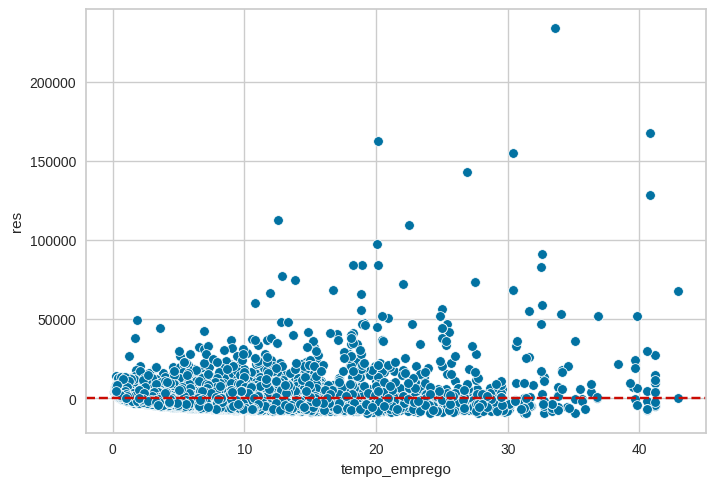

In [69]:
sns.scatterplot(x = 'tempo_emprego', y = df['res'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

2)Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.
<br>
3)Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros Faça uma análise de resíduos. Avalie a qualidade do ajuste

In [70]:
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,res,pred_log
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34,1331.028985,6729.311015
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15,-5109.384371,6961.534371
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89,1018.733077,1235.156923
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77,720.450884,5880.319116
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97,927.201144,5548.768856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,M,False,True,0,Assalariado,Superior completo,Casado,Casa,58,4.164384,2.0,15702.40,10236.761328,5465.638672
8651,M,False,False,1,Assalariado,Superior completo,Casado,Casa,33,1.041096,3.0,1918.14,136.360378,1781.779622
8652,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82,-6595.342821,7200.162821
8653,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27,-2199.982039,5552.252039


df[sexo	posse_de_veiculo	posse_de_imovel	qtd_filhos	tipo_renda	educacao	estado_civil	tipo_residencia	idade	tempo_emprego	qt_pessoas_residencia	renda]

In [71]:
y,x=patsy.dmatrices('renda~ tempo_emprego+sexo +posse_de_veiculo+ posse_de_imovel+ qtd_filhos+idade +tempo_emprego+ qt_pessoas_residencia +1', df[:5])
x

DesignMatrix with shape (5, 8)
  Columns:
    ['Intercept',
     'sexo[T.M]',
     'posse_de_veiculo[T.True]',
     'posse_de_imovel[T.True]',
     'tempo_emprego',
     'qtd_filhos',
     'idade',
     'qt_pessoas_residencia']
  Terms:
    'Intercept' (column 0)
    'sexo' (column 1)
    'posse_de_veiculo' (column 2)
    'posse_de_imovel' (column 3)
    'tempo_emprego' (column 4)
    'qtd_filhos' (column 5)
    'idade' (column 6)
    'qt_pessoas_residencia' (column 7)
  (to view full data, use np.asarray(this_obj))

In [72]:
y

DesignMatrix with shape (5, 1)
    renda
  8060.34
  1852.15
  2253.89
  6600.77
  6475.97
  Terms:
    'renda' (column 0)

In [73]:
reg = smf.ols('renda~ tempo_emprego+sexo +posse_de_veiculo+ posse_de_imovel+ qtd_filhos+idade +tempo_emprego+ qt_pessoas_residencia', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     406.0
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:59:15   Log-Likelihood:                -89901.
No. Observations:                8655   AIC:                         1.798e+05
Df Residuals:                    8647   BIC:                         1.799e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -3028.3668    557.725     -5.430      0.000   -4121.641   -1935.093
sexo[T.M]                 6105.0038    188.838     32.329      0.000    5734.835    6475.172
posse_de_veiculo[T.True]   210.3140    183.191      1.148      0.251    -148.784     569.412
posse_de_imovel[T.True]    379.8937    178.536      2.128      0.033      29.920     729.867
tempo_emprego              545.7266     13.292     41.057      0.000     519.671     571.782
qtd_filhos                -202.5245    250.314     -0.809      0.418    -693.200     288.151
idade                       42.3593      9.977      4.245      0.000      22.801      61.918
qt_pessoas_residencia      302.6243    209.909      1.442      0.149    -108.848     714.096
==============================================================================
Omnibus:                    12748.494   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8694894.715
Skew:                           8.731   Prob(JB):                         0.00
Kurtosis:                     157.291   Cond. No.                         298.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
y,x=patsy.dmatrices('renda~ tempo_emprego+sexo +posse_de_veiculo+ posse_de_imovel+ qtd_filhos+idade +tempo_emprego+ qt_pessoas_residencia +0', df[:5])
x

DesignMatrix with shape (5, 8)
  Columns:
    ['sexo[F]',
     'sexo[M]',
     'posse_de_veiculo[T.True]',
     'posse_de_imovel[T.True]',
     'tempo_emprego',
     'qtd_filhos',
     'idade',
     'qt_pessoas_residencia']
  Terms:
    'sexo' (columns 0:2)
    'posse_de_veiculo' (column 2)
    'posse_de_imovel' (column 3)
    'tempo_emprego' (column 4)
    'qtd_filhos' (column 5)
    'idade' (column 6)
    'qt_pessoas_residencia' (column 7)
  (to view full data, use np.asarray(this_obj))

In [75]:
y

DesignMatrix with shape (5, 1)
    renda
  8060.34
  1852.15
  2253.89
  6600.77
  6475.97
  Terms:
    'renda' (column 0)

**Criando um novo Modelo com base na Matriz de Modelagem**

In [76]:
novos_dados = df[20:30]
new_x = patsy.build_design_matrices([x.design_info], novos_dados)
new_x

[DesignMatrix with shape (10, 8)
   Columns:
     ['sexo[F]',
      'sexo[M]',
      'posse_de_veiculo[T.True]',
      'posse_de_imovel[T.True]',
      'tempo_emprego',
      'qtd_filhos',
      'idade',
      'qt_pessoas_residencia']
   Terms:
     'sexo' (columns 0:2)
     'posse_de_veiculo' (column 2)
     'posse_de_imovel' (column 3)
     'tempo_emprego' (column 4)
     'qtd_filhos' (column 5)
     'idade' (column 6)
     'qt_pessoas_residencia' (column 7)
   (to view full data, use np.asarray(this_obj))]

In [77]:
#verificando o log e total renda padronizada:
y,x=patsy.dmatrices('sexo~renda + standardize (qtd_filhos) + center(renda)' , df[:5])
x

DesignMatrix with shape (5, 4)
  Intercept    renda  standardize(qtd_filhos)  center(renda)
          1  8060.34                     -0.5       3011.716
          1  1852.15                     -0.5      -3196.474
          1  2253.89                     -0.5      -2794.734
          1  6600.77                      2.0       1552.146
          1  6475.97                     -0.5       1427.346
  Terms:
    'Intercept' (column 0)
    'renda' (column 1)
    'standardize(qtd_filhos)' (column 2)
    'center(renda)' (column 3)

Após análise foi retirado as variáveis com P-value acima de 0.5, permanecendo somente as variáveis renda, idade,tempo_emprego e posse_de_imovel. com:<br>
P-values:0.355, 0.363, 0.371, 0.428 e R-squared:0.753

In [78]:
y,x=patsy.dmatrices('renda~idade +tempo_emprego+posse_de_imovel+1', df[:5])
modelo=sm.OLS(y,x).fit()
modelo.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.017
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.605
Time:                        00:59:15   Log-Likelihood:                -42.740
No. Observations:                   5   AIC:                             93.48
Df Residuals:                       1   BIC:                             91.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                8.774e+04   5.48e+04      1.602      0.355   -6.08e+05    7.84e+05
posse_de_imovel[T.True] -7390.6378   4743.701     -1.558      0.363   -6.77e+04    5.29e+04
idade                   -2150.0049   1418.391     -1.516      0.371   -2.02e+04    1.59e+04
tempo_emprego           -2403.2761   1912.670     -1.257      0.428   -2.67e+04    2.19e+04
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.116
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.257
Skew:                           1.226   Prob(JB):                        0.534
Kurtosis:                       2.859   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Análise de Resíduos

In [79]:
reg = smf.ols('renda ~ np.log(tempo_emprego+idade+posse_de_imovel+1)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     579.9
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          4.49e-124
Time:                        00:59:15   Log-Likelihood:                -90850.
No. Observations:                8655   AIC:                         1.817e+05
Df Residuals:                    8653   BIC:                         1.817e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

<ipython-input-79-c5960bd3129c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res'] = reg.resid


<ipython-input-80-f6c4e62ca25e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res'] = reg.resid


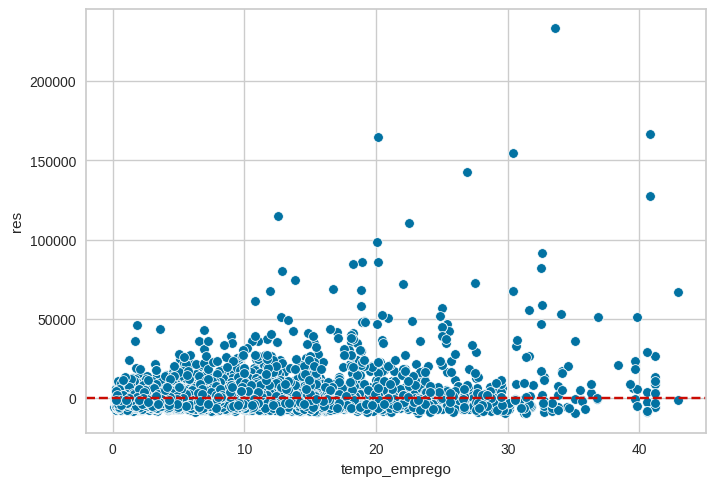

In [80]:
reg = smf.ols('renda ~ np.log(tempo_emprego+idade+posse_de_imovel+3)', data = df).fit()
#print(reg.summary())
df['res'] = reg.resid
sns.scatterplot(x = 'tempo_emprego', y = df['res'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='tempo_emprego', ylabel='res'>

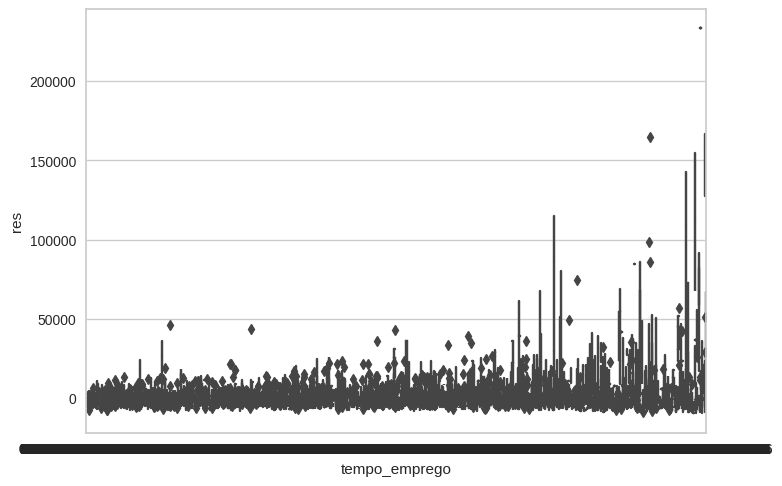

In [81]:
sns.boxplot(x = 'tempo_emprego', y = df['res'], data = df)

<Axes: xlabel='idade', ylabel='res'>

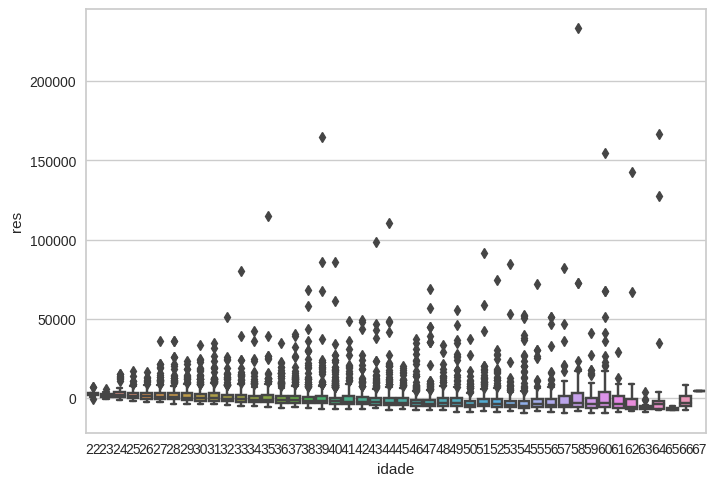

In [82]:
sns.boxplot(x = 'idade', y = df['res'], data = df)

<Axes: xlabel='posse_de_imovel', ylabel='res'>

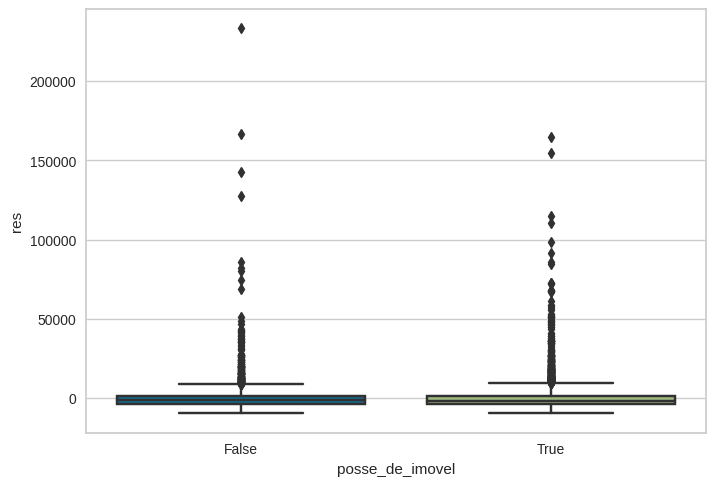

In [83]:
sns.boxplot(x = 'posse_de_imovel', y = df['res'], data = df)

<ipython-input-84-f4f3bf779c9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred_log'] = reg.fittedvalues


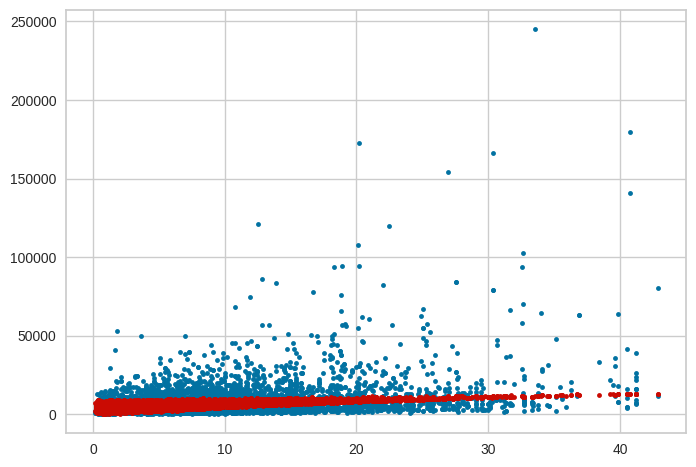

In [84]:
# Análise dos valores preditos
df['pred_log'] = reg.fittedvalues
plt.plot(df['tempo_emprego'],df['renda'],'.')
plt.plot(df['tempo_emprego'],df['pred_log'],'r.')

In [85]:
y,x=patsy.dmatrices('np.log(tempo_emprego+.1) ~ np.log(renda+.1)',df[:5])
modelo=sm.OLS(y,x).fit()
modelo.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(tempo_emprego + .1)   R-squared:                       0.151
Model:                                    OLS   Adj. R-squared:                 -0.133
Method:                         Least Squares   F-statistic:                    0.5315
Date:                        Fri, 27 Oct 2023   Prob (F-statistic):              0.519
Time:                                01:00:05   Log-Likelihood:                -5.2210
No. Observations:                           5   AIC:                             14.44
Df Residuals:                               3   BIC:                             13.66
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.5731      5.438     -0.473      0.668     -19.878      14.732
np.log(renda + .1)     0.4728      0.649      0.729      0.519      -1.591       2.537
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.767
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.141
Skew:                          -0.290   Prob(JB):                        0.932
Kurtosis:                       2.419   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análise dos valores predictos:

<ipython-input-86-583b965bb6a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred_log'] = reg.fittedvalues


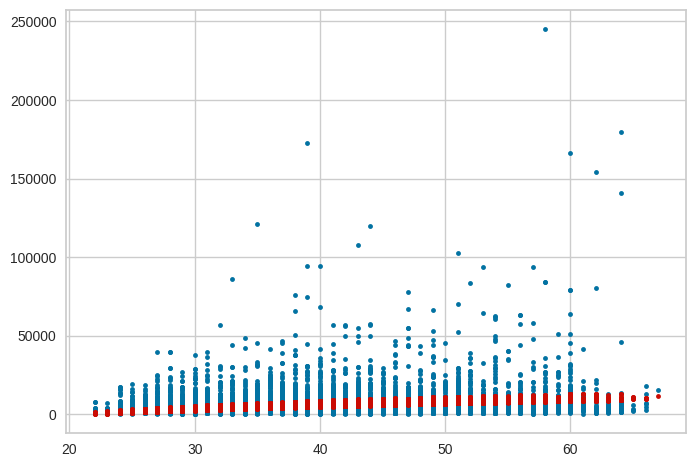

In [86]:
df['pred_log'] = reg.fittedvalues
plt.plot(df['idade'],df['renda'],'.')
plt.plot(df['idade'],df['pred_log'],'r.')

In [87]:
y,x=patsy.dmatrices('np.log(idade+.1) ~ np.log(renda+.1)',df[:5])
modelo=sm.OLS(y,x).fit()
modelo.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(idade + .1)   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                 -0.229
Method:                 Least Squares   F-statistic:                    0.2556
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.648
Time:                        01:00:05   Log-Likelihood:                 4.2766
No. Observations:                   5   AIC:                            -4.553
Df Residuals:                       3   BIC:                            -5.334
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8223      0.814      4.697      0.018       1.233       6.412
np.log(renda + .1)    -0.0491      0.097     -0.506      0.648      -0.358       0.260
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.378
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.648
Skew:                          -0.098   Prob(JB):                        0.723
Kurtosis:                       1.248   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-88-31185c44199f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred_log'] = reg.fittedvalues


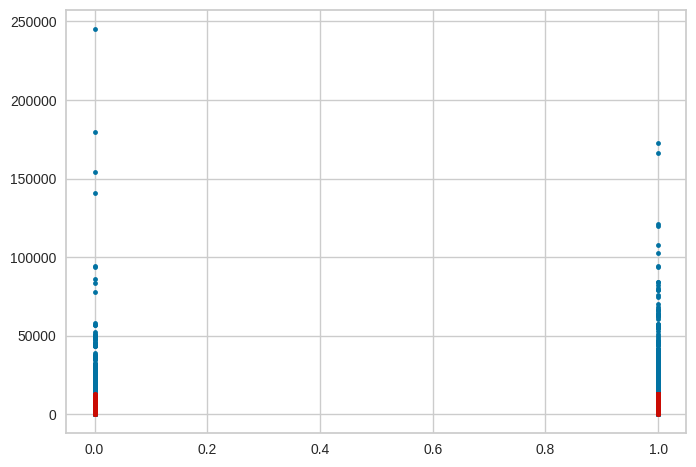

In [88]:
# Análise dos valores preditos
df['pred_log'] = reg.fittedvalues
plt.plot(df['posse_de_imovel'],df['renda'],'.')
plt.plot(df['posse_de_imovel'],df['pred_log'],'r.')

In [89]:
y,x=patsy.dmatrices('np.log(posse_de_imovel+.1) ~ np.log(renda+.1)',df[:5])
modelo=sm.OLS(y,x).fit()
modelo.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.log(posse_de_imovel + .1)   R-squared:                       0.114
Model:                                      OLS   Adj. R-squared:                 -0.181
Method:                           Least Squares   F-statistic:                    0.3872
Date:                          Fri, 27 Oct 2023   Prob (F-statistic):              0.578
Time:                                  01:00:05   Log-Likelihood:                -6.5827
No. Observations:                             5   AIC:                             17.17
Df Residuals:                                 3   BIC:                             16.38
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.0469      7.140      0.567      0.610     -18.676      26.770
np.log(renda + .1)    -0.5299      0.852     -0.622      0.578      -3.240       2.180
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.655
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.004
Skew:                          -1.089   Prob(JB):                        0.605
Kurtosis:                       2.719   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
y,x=patsy.dmatrices('np.power(tempo_emprego,2) ~ renda + np.power(renda,2)', df[:5])
modelo=sm.OLS(y,x).fit()
modelo.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.power(tempo_emprego, 2)   R-squared:                       0.402
Model:                                    OLS   Adj. R-squared:                 -0.197
Method:                         Least Squares   F-statistic:                    0.6714
Date:                        Fri, 27 Oct 2023   Prob (F-statistic):              0.598
Time:                                01:00:05   Log-Likelihood:                -20.318
No. Observations:                           5   AIC:                             46.64
Df Residuals:                               2   BIC:                             45.46
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             83.0855     57.146      1.454      0.283    -162.794     328.965
renda                 -0.0347      0.032     -1.102      0.385      -0.170       0.101
np.power(renda, 2)  3.766e-06   3.31e-06      1.138      0.373   -1.05e-05     1.8e-05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.317
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.194
Skew:                          -0.331   Prob(JB):                        0.907
Kurtosis:                       2.296   Cond. No.                     2.28e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

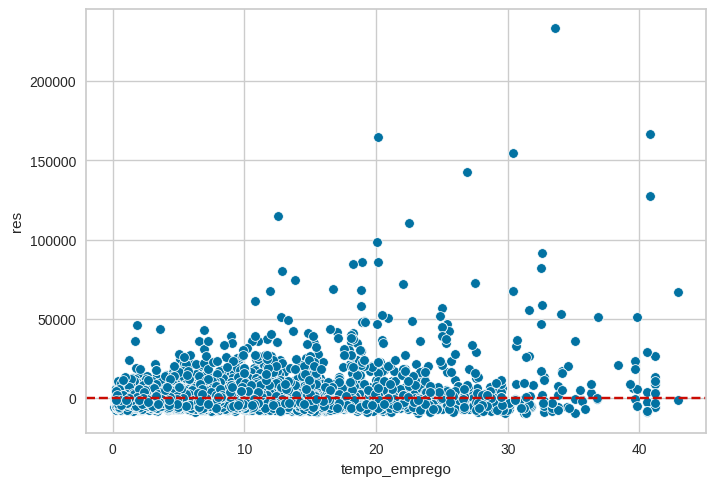

In [91]:
sns.scatterplot(x = 'tempo_emprego', y = df['res'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [92]:
y,x=patsy.dmatrices('np.power(idade,2) ~ renda + np.power(renda,2)', df[:5])
modelo=sm.OLS(y,x).fit()
modelo.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.power(idade, 2)   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1.426
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.412
Time:                        01:00:06   Log-Likelihood:                -31.357
No. Observations:                   5   AIC:                             68.71
Df Residuals:                       2   BIC:                             67.54
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            381.6880    519.822      0.734      0.539   -1854.924    2618.300
renda                  0.3885      0.287      1.355      0.308      -0.845       1.622
np.power(renda, 2) -4.429e-05   3.01e-05     -1.471      0.279      -0.000    8.52e-05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.576
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.351
Skew:                           0.118   Prob(JB):                        0.839
Kurtosis:                       1.723   Cond. No.                     2.28e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

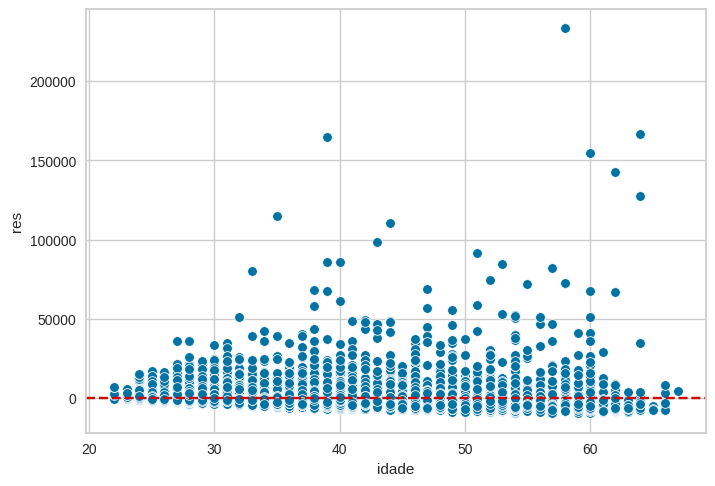

In [93]:
sns.scatterplot(x = 'idade', y = df['res'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [94]:
y,x=patsy.dmatrices('np.power(posse_de_imovel,2) ~ renda + np.power(renda,2)', df[:5])
modelo=sm.OLS(y,x).fit()
modelo.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.power(posse_de_imovel, 2)   R-squared:                       0.389
Model:                                      OLS   Adj. R-squared:                 -0.221
Method:                           Least Squares   F-statistic:                    0.6377
Date:                          Fri, 27 Oct 2023   Prob (F-statistic):              0.611
Time:                                  01:00:06   Log-Likelihood:                -1.2800
No. Observations:                             5   AIC:                             8.560
Df Residuals:                                 2   BIC:                             7.388
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.2025      1.269      1.736      0.225      -3.256       7.661
renda                 -0.0007      0.001     -1.062      0.399      -0.004       0.002
np.power(renda, 2)  7.386e-08   7.35e-08      1.005      0.421   -2.42e-07     3.9e-07
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.314
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.090
Skew:                          -0.020   Prob(JB):                        0.956
Kurtosis:                       2.343   Cond. No.                     2.28e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

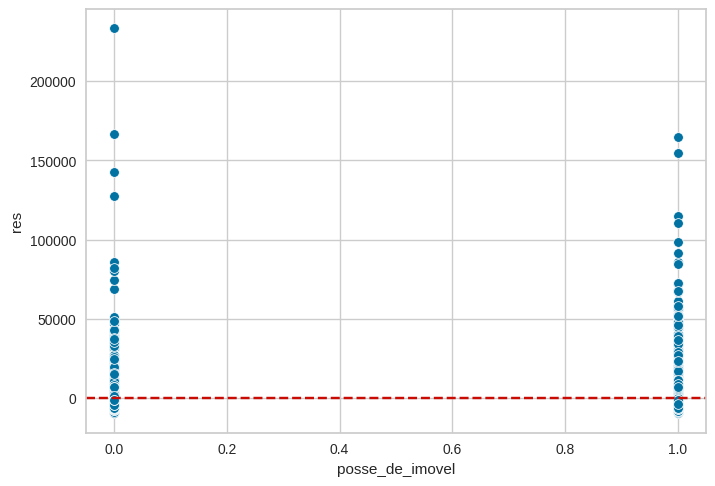

In [95]:
sns.scatterplot(x = 'posse_de_imovel', y = df['res'], data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [96]:
df['renda'] = reg.fittedvalues

r = df[['renda', 'tempo_emprego']].corr().iloc[0,1]

<ipython-input-96-a5589231d134>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renda'] = reg.fittedvalues


In [97]:
r**2

0.4701813034614348

In [98]:
df['renda'] = reg.fittedvalues

r = df[['renda', 'idade']].corr().iloc[0,1]

<ipython-input-98-db10ee146448>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renda'] = reg.fittedvalues


In [99]:
r**2

0.799141443751523

In [100]:
df['renda'] = reg.fittedvalues

r = df[['renda', 'posse_de_imovel']].corr().iloc[0,1]

<ipython-input-100-aef4b1637519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renda'] = reg.fittedvalues


In [101]:
r**2

0.013900068098961053

Após Análise de Valores predictos, o modelo mais ajustado e adequado e:<br>
tempo_emprego<br>
com	R-squared:	0.402 e P-value: 0.385<br>
Porém foi encontrado esse modelo abaixo que parece bem mais ajustado:<br>
 R-squared: 0.985 <br>
 P-value:0.000



In [102]:
reg = smf.ols('renda ~ tempo_emprego +idade+ np.power(tempo_emprego,2)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.033e+05
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:00:07   Log-Likelihood:                -60712.
No. Observations:                8655   AIC:                         1.214e+05
Df Residuals:                    8651   BIC:                         1.215e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

<ipython-input-102-cef2c1546167>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res'] = reg.resid


In [103]:
df['renda'] = reg.fittedvalues

r = df[['renda', 'posse_de_imovel','idade']].corr().iloc[0,1]

<ipython-input-103-4fb612abfe7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renda'] = reg.fittedvalues


In [104]:
r**2

0.005934789783601452

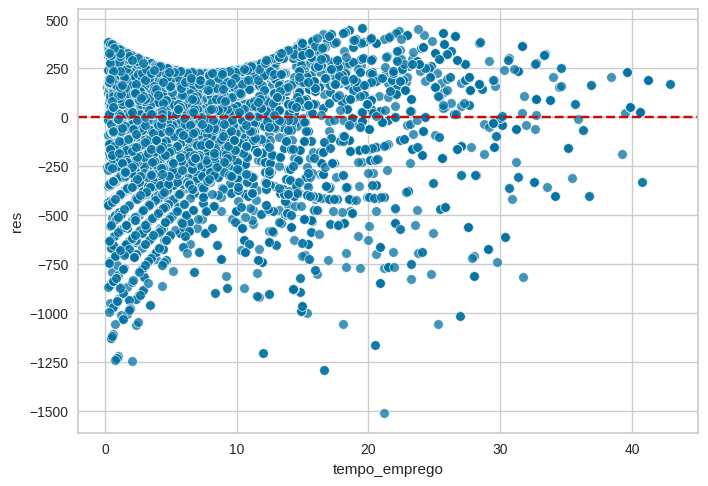

In [105]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')